In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('creditcardl.csv.zip')
df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.dtypes.value_counts()


,count
float64,30
int64,1


**Checklist de base **
Analyse de forme


* Variable target :
* ligne et colonne :284807, 31
* types de variables : 30
* Analyse des valeurs manquantes :Aucune valeurs manquantes
Algorithmes de Machine Learning sont sensibles au valeurs extrêmes ou abérantes

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# Calcul des quartiles et de l'IQR (écart interquartile)
Q1 = df['V1'].quantile(0.25)
Q3 = df['V1'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites pour détecter les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les outliers
outliers = df[(df['V1'] < lower_bound) | (df['V1'] > upper_bound)]
print(f"Nombre de valeurs aberrantes : {len(outliers)}")
print("Répartition des classes dans le DataFrame complet :")
print(df['Class'].value_counts())



Nombre de valeurs aberrantes : 7062
Répartition des classes dans le DataFrame complet :
Class
0    284315
1       492
Name: count, dtype: int64


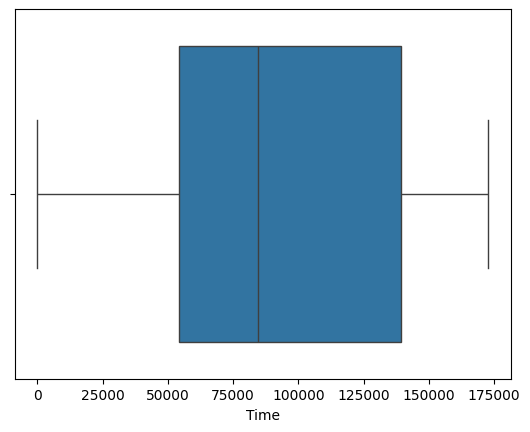

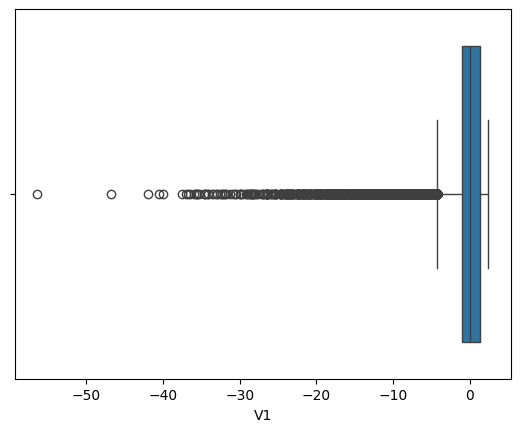

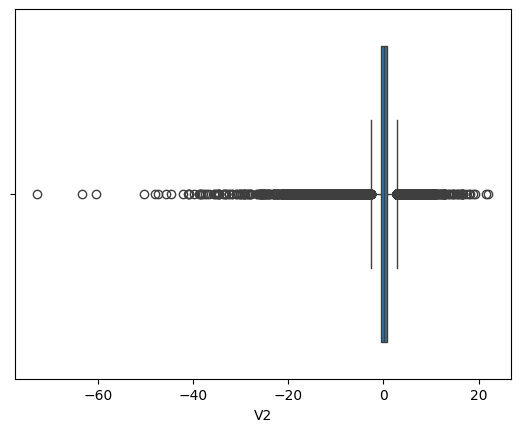

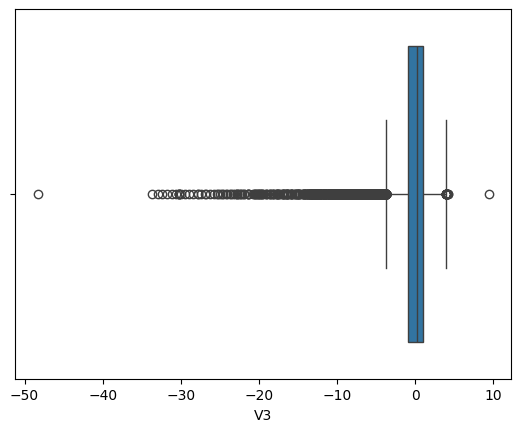

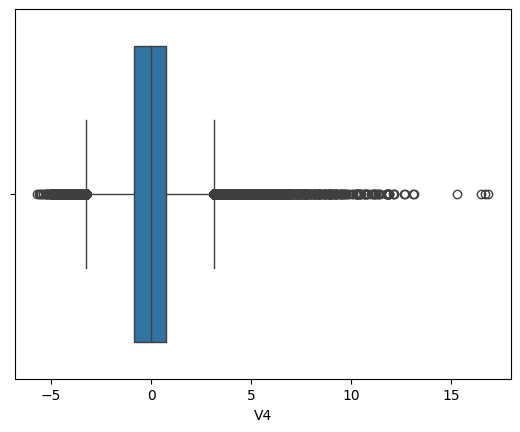

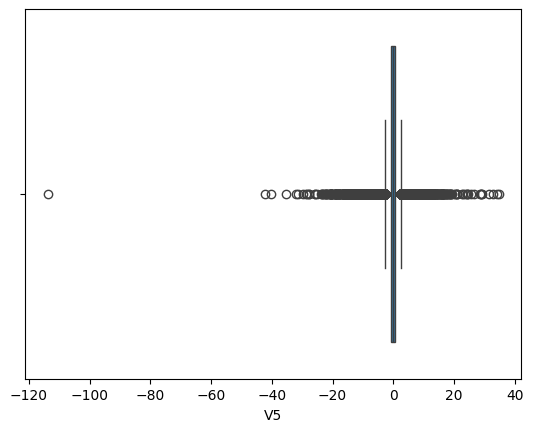

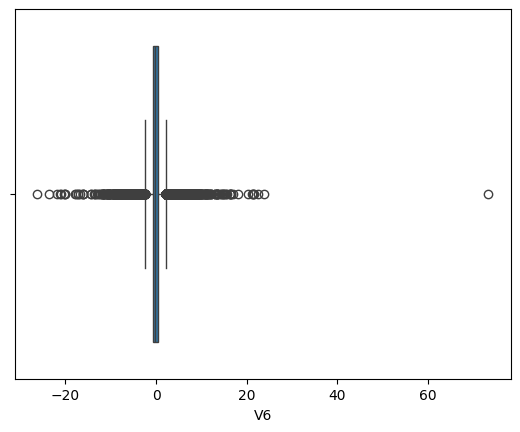

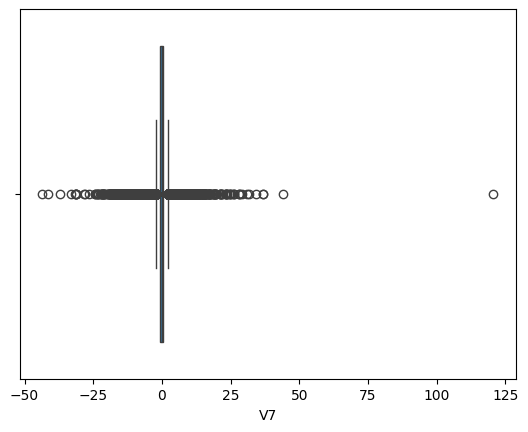

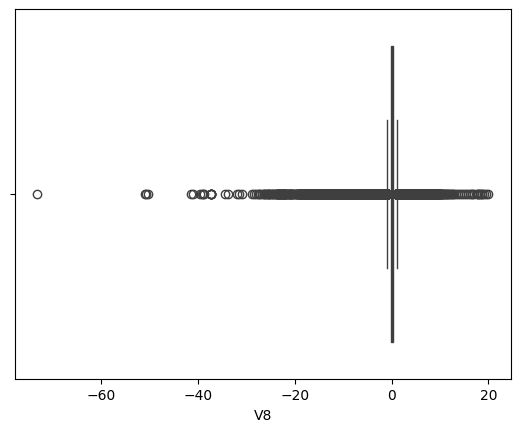

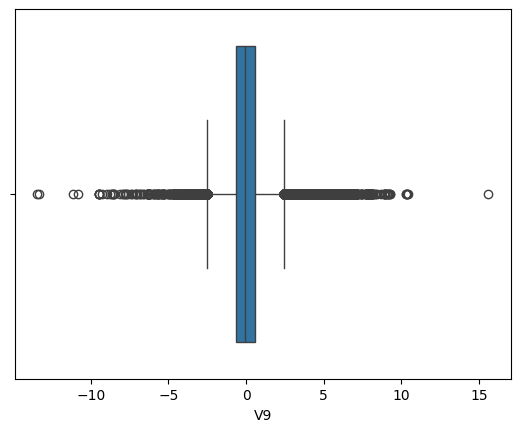

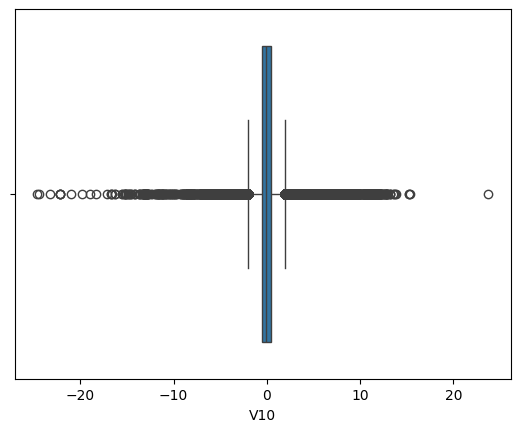

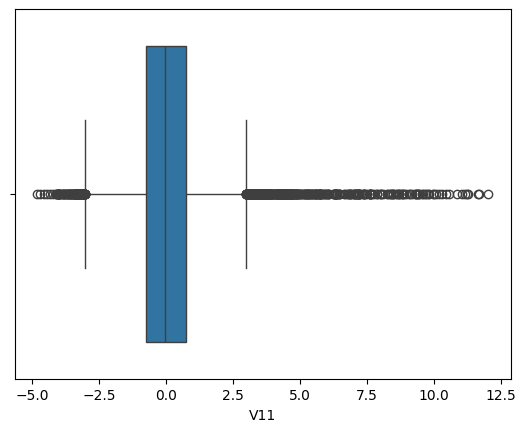

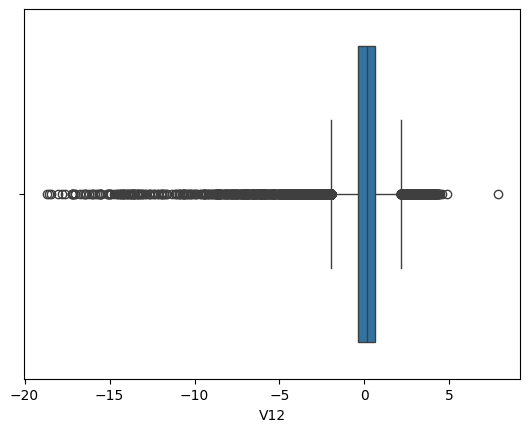

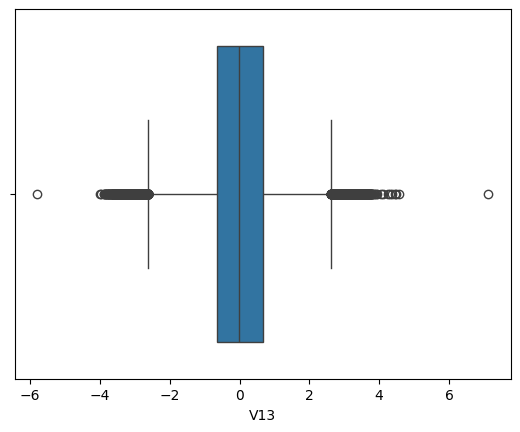

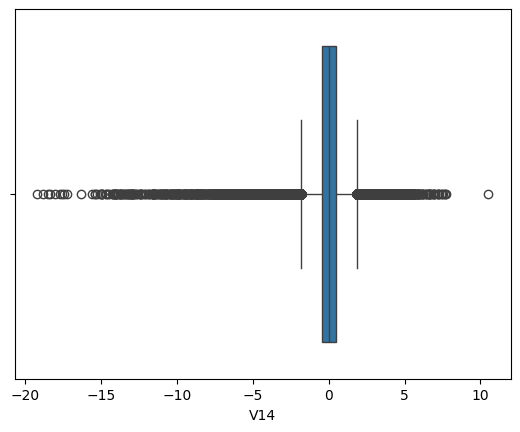

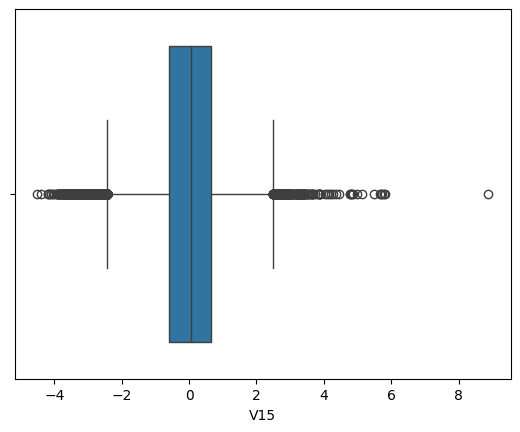

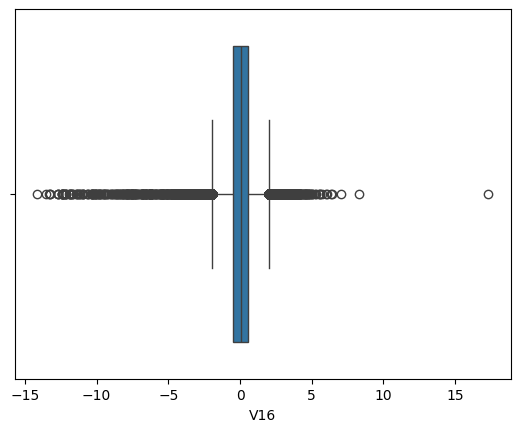

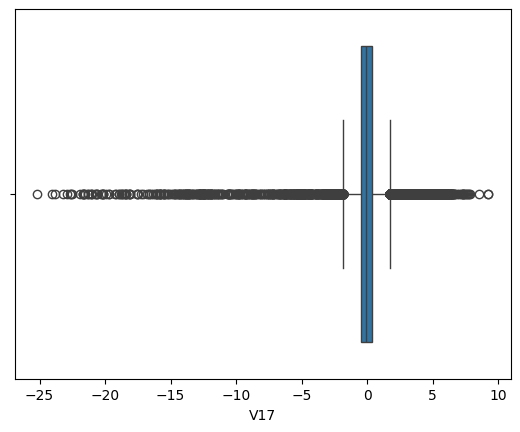

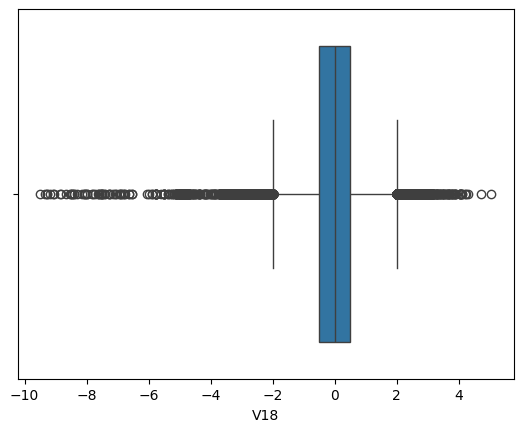

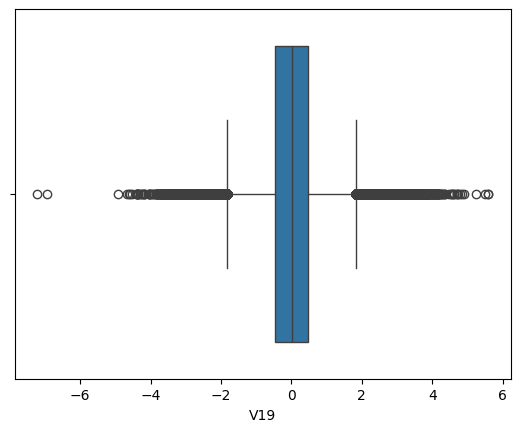

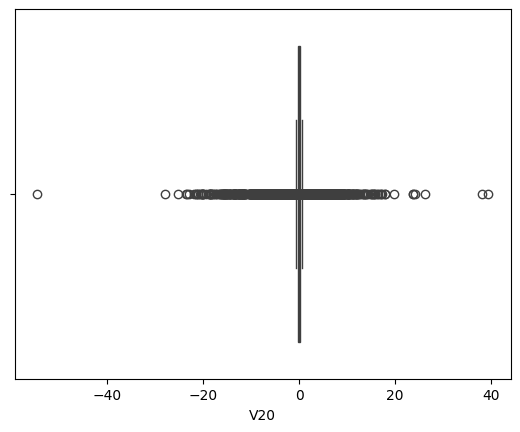

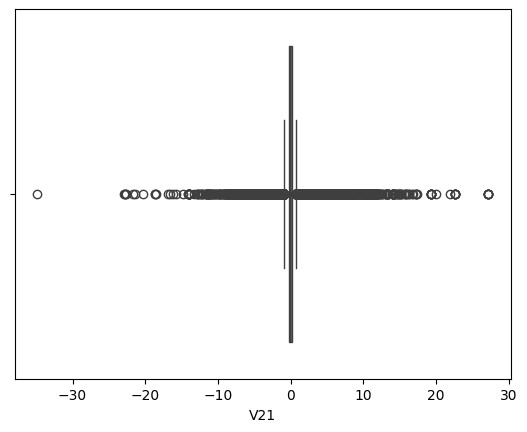

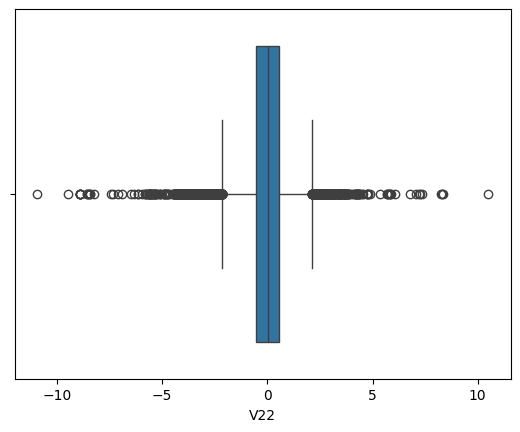

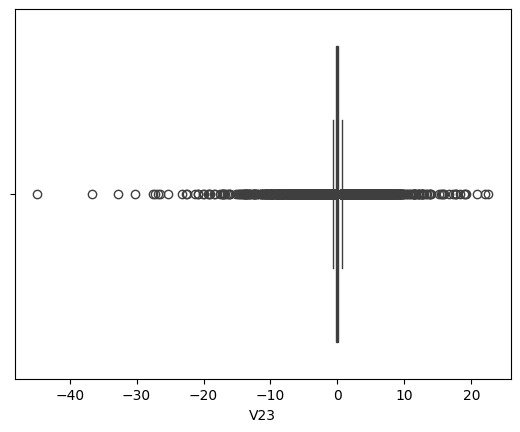

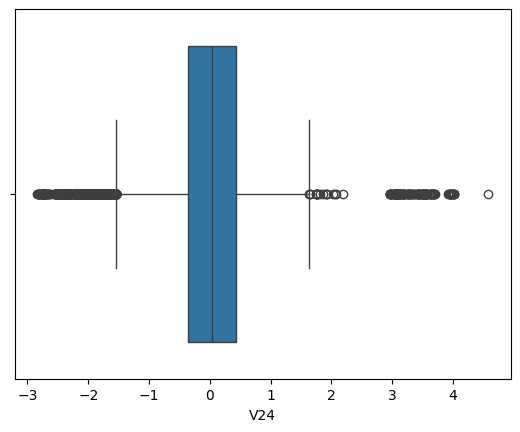

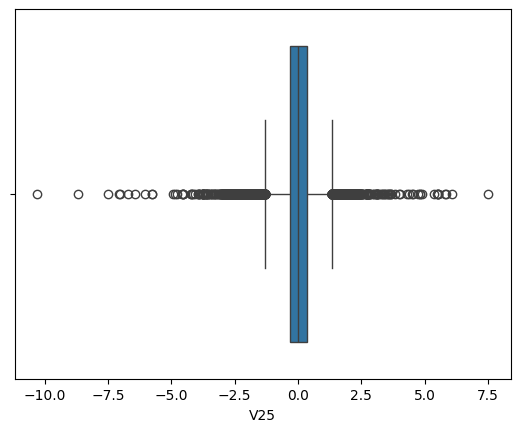

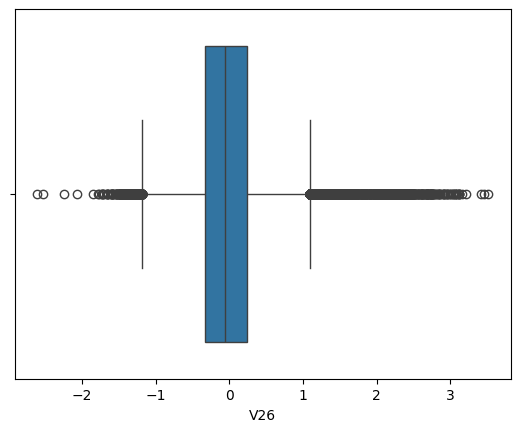

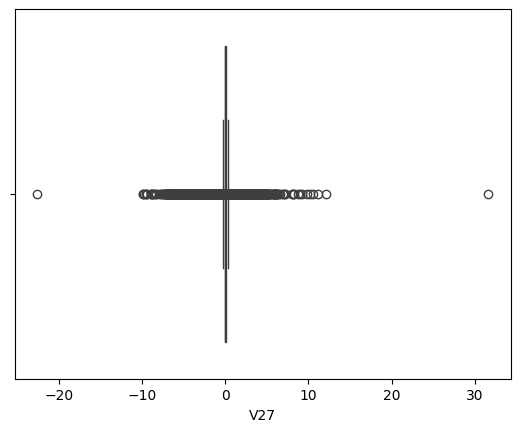

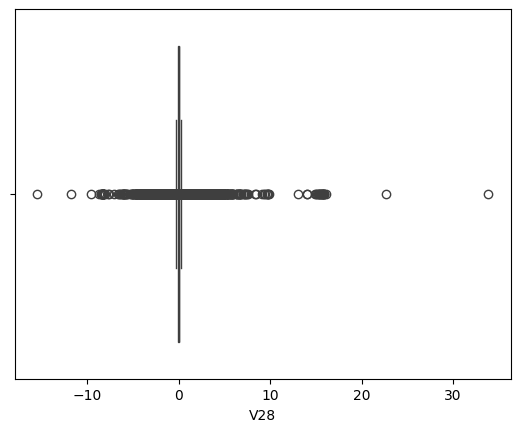

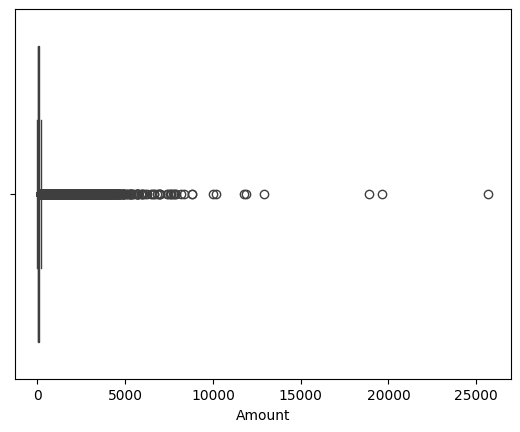

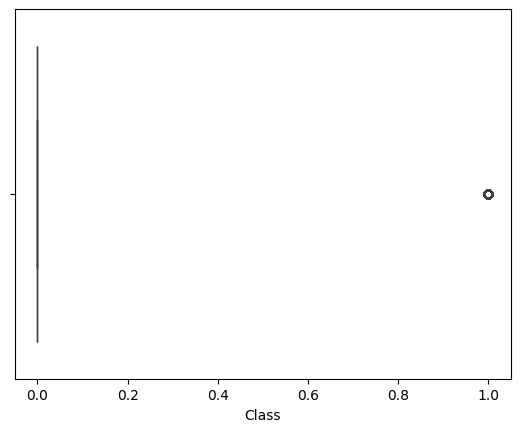

In [ ]:
  # visualisation des outliers
  for col in df.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df[col])
    plt.show()

In [ ]:
for col in df.select_dtypes(exclude=["object"]).columns:
    sns.boxplot(x=df[col])
    plt.show()


Répartition des classes dans le DataFrame complet :
Class
0    284807
Name: count, dtype: int64


In [ ]:
# utilisation de la methode MinMaxScaler pour normaliser les données
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sélection des colonnes à normaliser
columns_to_normalize = [col for col in df.columns if col.startswith('V')]
columns_to_normalize.append('Amount')

# Initialisation du scaler
scaler = MinMaxScaler()

# Application du Min-Max Scaling
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
print("Données normalisées :")
print(df[columns_to_normalize].head())
print("Répartition des classes dans le DataFrame complet :")
print(df['Class'].value_counts())


Données normalisées :
         V1        V2        V3        V4        V5        V6        V7  \
0  0.935192  0.766490  0.881365  0.313023  0.763439  0.267669  0.266815   
1  0.978542  0.770067  0.840298  0.271796  0.766120  0.262192  0.264875   
2  0.935217  0.753118  0.868141  0.268766  0.762329  0.281122  0.270177   
3  0.941878  0.765304  0.868484  0.213661  0.765647  0.275559  0.266803   
4  0.938617  0.776520  0.864251  0.269796  0.762975  0.263984  0.268968   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.786444  0.475312  0.510600  ...  0.582942  0.561184  0.522992  0.663793   
1  0.786298  0.453981  0.505267  ...  0.579530  0.557840  0.480237  0.666938   
2  0.788042  0.410603  0.513018  ...  0.585855  0.565477  0.546030  0.678939   
3  0.789434  0.414999  0.507585  ...  0.578050  0.559734  0.510277  0.662607   
4  0.782484  0.490950  0.524303  ...  0.584615  0.561327  0.547271  0.663392   

        V24       V25       V26       V27     

In [ ]:
df = df.drop(df.columns[0], axis=1)
df.head()
print("Répartition des classes dans le DataFrame complet :")
print(df['Class'].value_counts())

Répartition des classes dans le DataFrame complet :
Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
# Utilisation de la méthode Oversampling pour le réequilibrage des classes
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Définir la cible (y) et les caractéristiques (x)
y = df['Class']  # Colonne cible
x = df.drop('Class', axis=1)  # Toutes les autres colonnes comme caractéristiques

# 2. Diviser les données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Stratification pour conserver les proportions des classes
)

# Vérifier la répartition des classes après la division
print("Répartition des classes dans y_train avant oversampling :")
print(y_train.value_counts())

print("Répartition des classes dans y_test :")
print(y_test.value_counts())

# 3. Initialiser l'objet RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1, random_state=42)

# 4. Appliquer l'oversampling sur les données d'entraînement
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

# Vérifier la répartition des classes après oversampling
print("Répartition des classes dans y_train après oversampling :")
print(pd.Series(y_train_resampled).value_counts())


Répartition des classes dans y_train avant oversampling :
Class
0    227451
1       394
Name: count, dtype: int64
Répartition des classes dans y_test :
Class
0    56864
1       98
Name: count, dtype: int64
Répartition des classes dans y_train après oversampling :
Class
0    227451
1    227451
Name: count, dtype: int64
Répartition des classes dans le DataFrame complet :
Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
# Methode smote pour le réequilibrage des classes
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialiser l'objet SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Appliquer le rééchantillonnage SMOTE sur les données d'apprentissage
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Créer un nouveau DataFrame avec les données rééchantillonnées
bankdata_smote = pd.concat([X_train_smote, y_train_smote],axis=1)



Répartition des classes dans y_train après oversampling :
Class
0    227451
1    227451
Name: count, dtype: int64


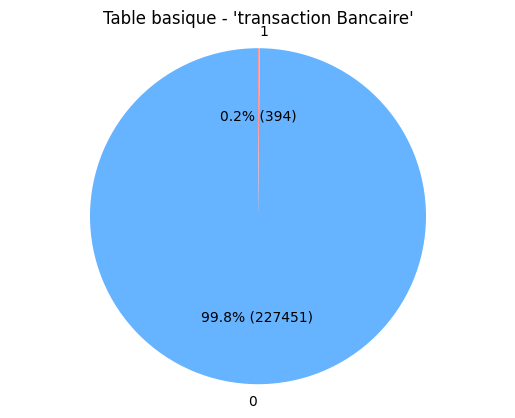

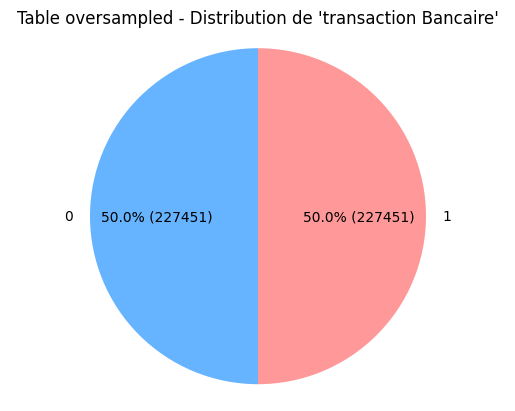

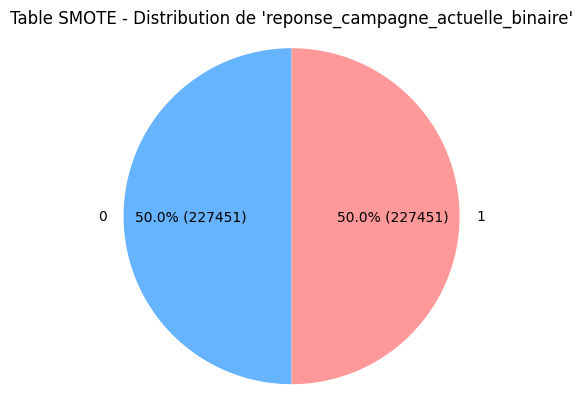

In [ ]:
# Fonction pour créer un pie chart avec les proportions et les nombres
def plot_pie_chart(y, title):
    labels = ['0', '1']
    sizes = y.value_counts().values
    colors = ['#66b3ff', '#ff9999']

    # Modifier le format des labels pour inclure les proportions et les nombres
    def autopct_format(pct, all_values):
        absolute = int(round(pct / 100 * sum(all_values)))
        return f"{pct:.1f}% ({absolute})"

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, colors=colors, autopct=lambda pct: autopct_format(pct, sizes), startangle=90)
    ax.axis('equal')  # Pour assurer que le diagramme est bien rond
    plt.title(title)
    plt.show()

# Créer un pie chart pour la table basique
plot_pie_chart(y_train, "Table basique - 'transaction Bancaire'")

# Créer un pie chart pour la table oversampled
plot_pie_chart(y_train_resampled, "Table oversampled - Distribution de 'transaction Bancaire'")

# créer un pie chart pour la table oversampled
plot_pie_chart(y_train_smote, "Table SMOTE - Distribution de 'reponse_campagne_actuelle_binaire'")


In [ ]:
# Construction du modèle avec TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_dim=x_train_resampled.shape[1]),
    Dropout(0.2),  # Prévention contre l'overfitting ,
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Classification binaire
])

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(model.summary())  # Résumé de l'architecture du modèle


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 128)                 │           3,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,033 (47.00 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Entraînement du modèle
history = model.fit(x_train_resampled, y_train_resampled,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_test, y_test))



Epoch 1/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9277 - loss: 0.1857 - val_accuracy: 0.9779 - val_loss: 0.0929
Epoch 2/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.9457 - loss: 0.1371 - val_accuracy: 0.9726 - val_loss: 0.1062
Epoch 3/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.9499 - loss: 0.1237 - val_accuracy: 0.9695 - val_loss: 0.0935
Epoch 4/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 75s 2ms/step - accuracy: 0.9511 - loss: 0.1208 - val_accuracy: 0.9728 - val_loss: 0.0888
Epoch 5/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9540 - loss: 0.1160 - val_accuracy: 0.9726 - val_loss: 0.0922
Epoch 6/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.9567 - loss: 0.1075 - val_accuracy: 0.9795 - val_loss: 0.0778
Epoch 7/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.9590 - loss: 0.1013 - val_accuracy: 0.9874 - val_loss: 0.0545
Epoch 8/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 

In [ ]:
# Évaluation des performances sur l'ensemble de test
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Prédictions sur l'ensemble de test
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Rapport de Classification
print("\nRapport de Classification :\n", classification_report(y_test, y_pred))

# Score ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"\nScore ROC-AUC : {roc_auc}")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Rapport de Classification :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.89      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962


Score ROC-AUC : 0.9384435330125297


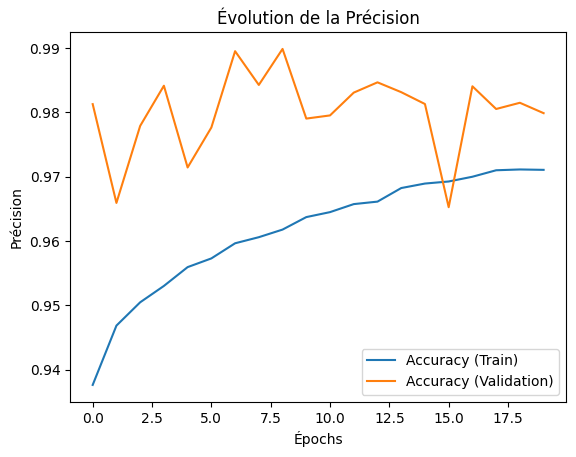

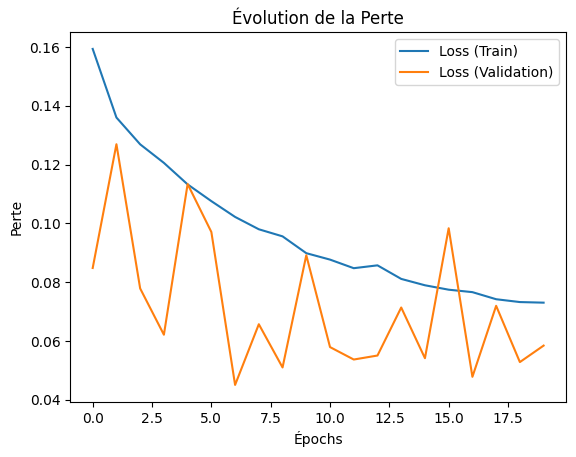

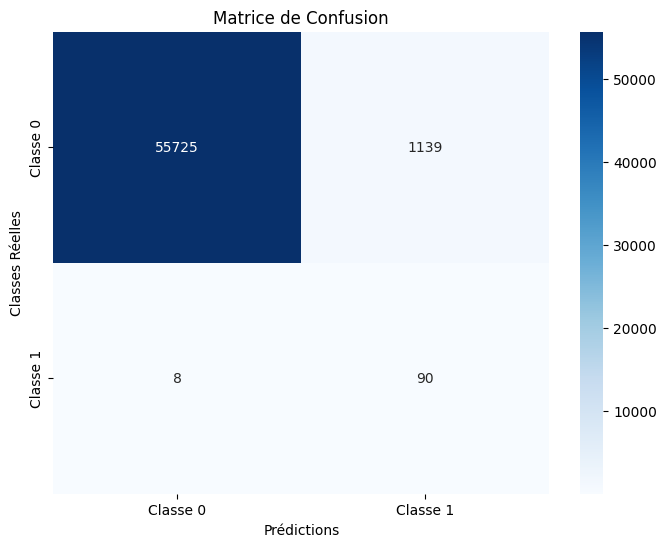

In [ ]:
# 5. Visualisation des performances
import matplotlib.pyplot as plt
import seaborn as sns

# Courbe de précision
plt.plot(history.history['accuracy'], label='Accuracy (Train)')
plt.plot(history.history['val_accuracy'], label='Accuracy (Validation)')
plt.title('Évolution de la Précision')
plt.xlabel('Épochs')
plt.ylabel('Précision')
plt.legend()
plt.show()

# Courbe de perte
plt.plot(history.history['loss'], label='Loss (Train)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.title('Évolution de la Perte')
plt.xlabel('Épochs')
plt.ylabel('Perte')
plt.legend()
plt.show()

# Affichage avec Seaborn de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Classes Réelles')
plt.show()

In [ ]:
!pip install --upgrade scikit-learn scikeras tensorflow keras

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Fonction pour créer le modèle
def create_model(neurons=128, learning_rate=0.001, dropout_rate=0.2):
    model = Sequential([
        Dense(neurons, activation='relu', input_dim=x_train_resampled.shape[1]),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Configuration du Wrapper KerasClassifier avec Scikeras
model = KerasClassifier(model=create_model, verbose=0)

# Grille des hyperparamètres
param_grid = {
    'model__neurons': [64, 128, 256],
    'batch_size': [32, 64],
    'epochs': [10, 20],
    'model__learning_rate': [0.01, 0.001, 0.0001],
    'model__dropout_rate': [0.2, 0.4]
}

# Configuration de GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Exécution avec gestion des erreurs
try:
    print("Démarrage de GridSearch...")
    grid_result = grid.fit(x_train_resampled, y_train_resampled)

    # Afficher les résultats
    print("Meilleurs paramètres :", grid_result.best_params_)
    print("Meilleur score :", grid_result.best_score_)
except AttributeError as attr_err:
    print("Erreur liée aux versions :", attr_err)
    print("Assurez-vous que Scikit-learn >= 1.0, Scikeras >= 0.10 et TensorFlow >= 2.6")
except Exception as e:
    print("Erreur générale :", str(e))


Démarrage de GridSearch...
Erreur liée aux versions : 'super' object has no attribute '__sklearn_tags__'
Assurez-vous que Scikit-learn >= 1.0, Scikeras >= 0.10 et TensorFlow >= 2.6


In [ ]:
# Affichage avec Seaborn de la matrice de confusion
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Classes Réelles')
plt.show()